In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
import os
from sklearn.utils import shuffle

2024-04-01 19:16:19.596443: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-01 19:16:19.976882: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-01 19:16:20.132449: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-01 19:16:21.067660: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

## Column-wise analysis

In [2]:
def col_plots(data): 
    # Extracting min, max, and average values column-wise
    min_values = data.min(axis=0)
    max_values = data.max(axis=0)
    avg_values = data.mean(axis=0)

    # Plotting
    plt.figure(figsize=(20, 6))

    # Plot for min values
    plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
    plt.plot(min_values, label='Min Values')
    plt.title('Minimum Values per Column')
    plt.xlabel('Column Index')
    plt.ylabel('Value')
    plt.legend()

    # Plot for max values
    plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
    plt.plot(max_values, label='Max Values')
    plt.title('Maximum Values per Column')
    plt.xlabel('Column Index')
    plt.ylabel('Value')
    plt.legend()

    # Plot for avg values
    plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
    plt.plot(avg_values, label='Average Values')
    plt.title('Average Values per Column')
    plt.xlabel('Column Index')
    plt.ylabel('Value')
    plt.legend()

    plt.tight_layout()
    plt.show()

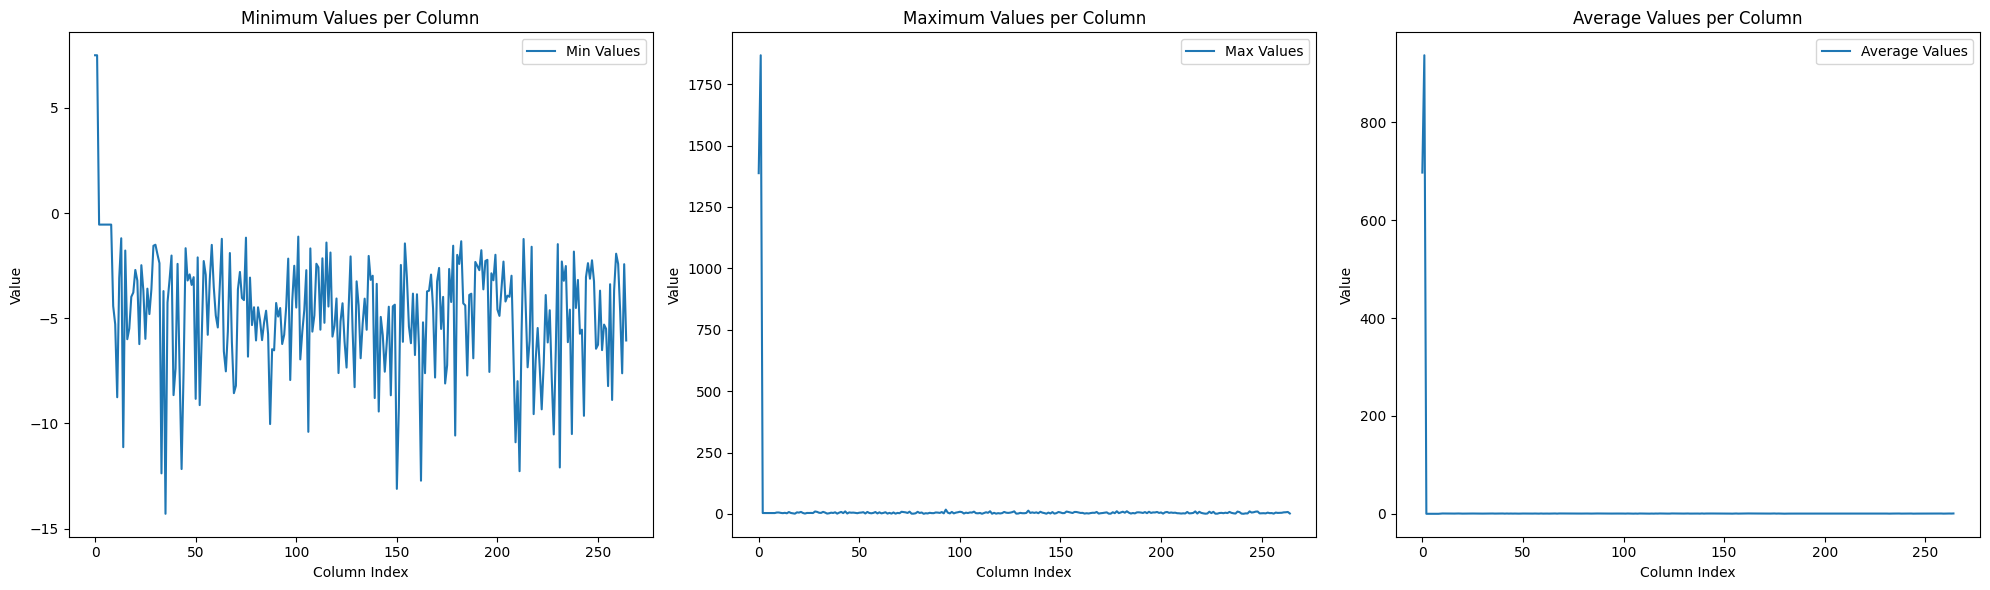

In [4]:
path = "/home/carol/NaroNet-main/EXP3/ConcInp_noNorm.npy"
cr_data = np.load(path)
col_plots(cr_data)

## Useful functions

In [4]:
#the input is a numpy array
def rowwise_maxs(emb):
    # Row-wise statistics
    row_maxs = np.max(emb, axis=1)

    # Example: Plot histogram for row-wise means
    plt.hist(row_maxs, bins=50, alpha=0.75)
    plt.title('Histogram of Row-wise Maxs')
    plt.xlabel('Mean Value')
    plt.ylabel('Frequency')
    plt.show()

#the input is a numpy array - 
def rowwise_means(emb):
    # Row-wise statistics
    row_means = np.mean(emb, axis=1)

    # Example: Plot histogram for row-wise means
    plt.hist(row_means, bins=50, alpha=0.75)
    plt.title('Histogram of Row-wise Means')
    plt.xlabel('Mean Value')
    plt.ylabel('Frequency')
    plt.show()

def plot_mean_max(folder_path):
    line_averages = []
    third_highest_values = []  # Changed from line_max_values to third_highest_values
    line_mins = []
    line_maxs = []
    # Iterating through each file in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.npy'):
            file_path = os.path.join(folder_path, filename)
            array = np.load(file_path)
            #array = np.minimum(array,10)
            # Calculate the average of each line and add it to the list
            line_averages.extend(np.mean(array, axis=1))
            
            # Calculate the third highest value of each line and add it to the list
            # Use numpy.partition and take the value at index -3 from the end for each line
            third_highest_values.extend(np.partition(array, -3, axis=1)[:, -3])
            line_mins.extend(np.min(array, axis=1))
            line_maxs.extend(np.max(array, axis=1))

    # Creating histograms
    plt.figure(figsize=(14, 6))

    # Histogram for line averages
    # plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    # plt.hist(line_averages, bins=100, alpha=0.75, color='blue', edgecolor='black')
    # plt.title('Histogram of Line Averages Across All Files')
    # plt.xlabel('Average Value')
    # plt.ylabel('Frequency')

    # Histogram for third highest values
    # plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    # plt.hist(third_highest_values, bins=100, alpha=0.75, color='red', edgecolor='black')  # Changed color to red for distinction
    # plt.title('Histogram of Line Third Highest Values Across All Files')
    # plt.xlabel('Third Highest Value')
    # plt.ylabel('Frequency')

    ##maxs
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    plt.hist(line_maxs, bins=100, alpha=0.75, color='red', edgecolor='black')  # Changed color to red for distinction
    plt.title('Histogram of Highest Values Across All Files')
    plt.xlabel('Highest Value')
    plt.ylabel('Frequency')


    # Histogram for line max values
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    plt.hist(line_mins, bins=100, alpha=0.75, color='green', edgecolor='black')
    plt.title('Histogram of Line Min Values Across All Files')
    plt.xlabel('Min Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

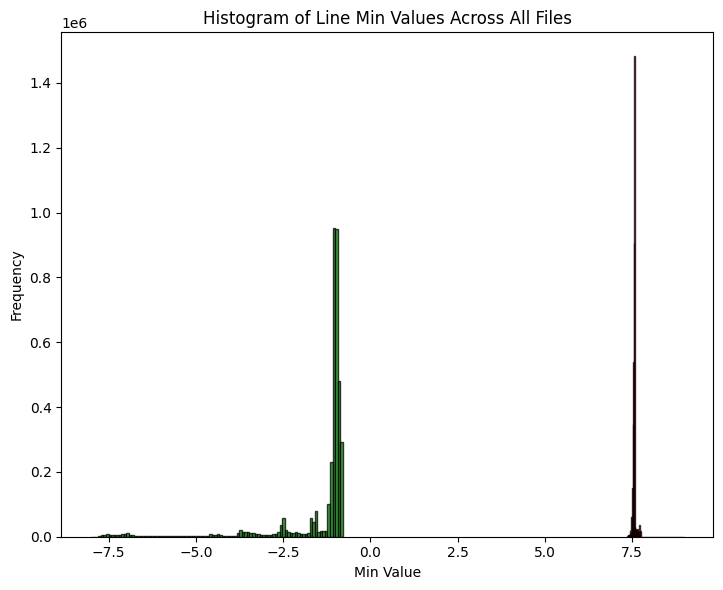

In [6]:
folder_path = '/home/carol/NaroNet-main/NaroNet-main/Endometrial_POLE/Patch_Contrastive_Learning/Image_Patch_Representation'
plot_mean_max(folder_path)

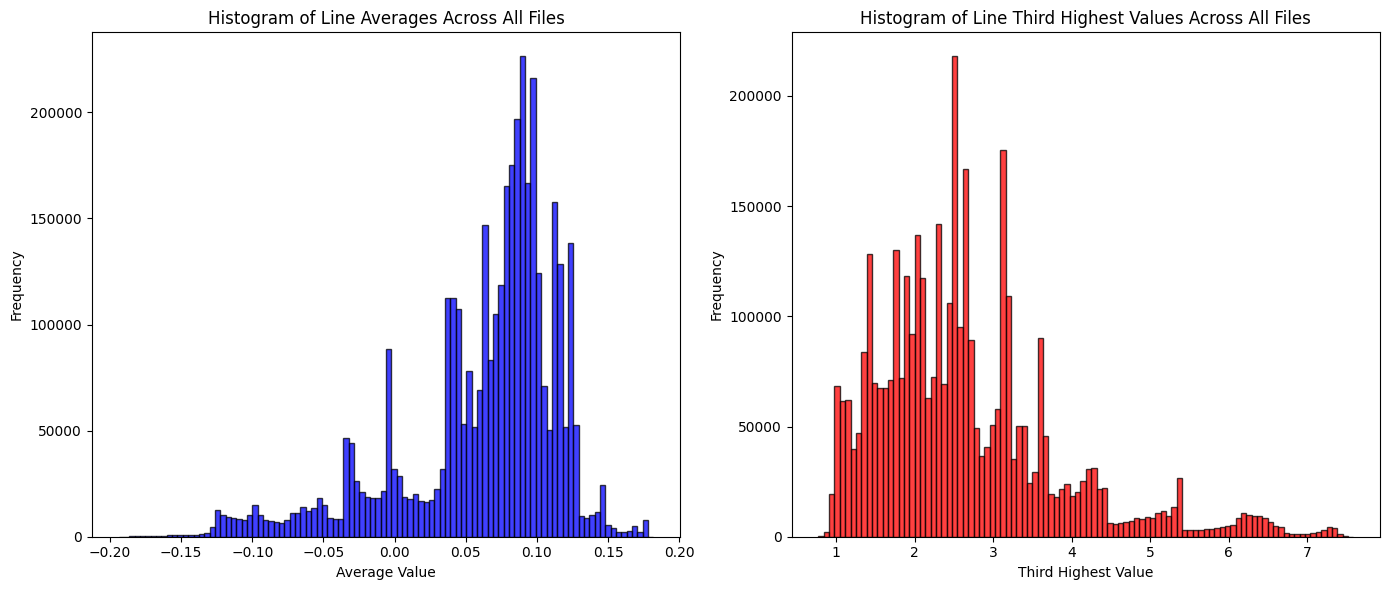

In [25]:
folder_path = '/home/carol/NaroNet-main/NaroNet-main/Endometrial_POLE/Patch_Contrastive_Learning/Image_Patch_Representation'
plot_mean_max(folder_path)

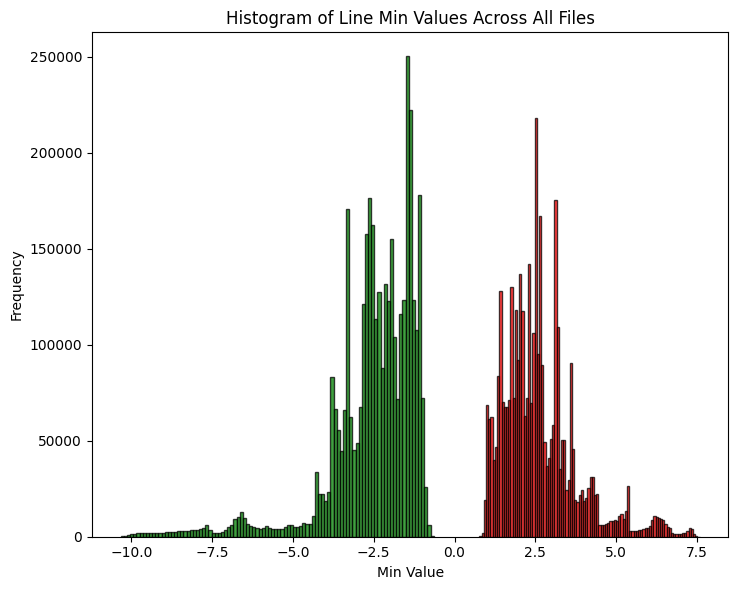

In [27]:
folder_path = '/home/carol/NaroNet-main/NaroNet-main/Endometrial_POLE/Patch_Contrastive_Learning/Image_Patch_Representation'
plot_mean_max(folder_path)

## Param dict check

In [3]:
#extra material exp1
params_extra = {"path": "/home/carol/NaroNet-main/NaroNet-main/Endometrial_POLE/", "PCL_embedding_dimensions": 256, "PCL_batch_size": 160, "PCL_epochs": 500, "PCL_patch_size": 15, "PCL_alpha_L": 1.15,
"PCL_ZscoreNormalization": True, "PCL_width_CNN": 2, "PCL_depth_CNN": 50, "experiment_Label": ["POLE Mutation", "Copy number variation", "MSI Status", "Tumour Type"],
"num_samples_architecture_search": 500, "epochs": 10, "epoch": 0, "lr_decay_factor": 0.5, "lr_decay_step_size": 12, "weight_decay": 0.0001, "batch_size": 20, "lr": 0.001,
"useOptimizer": "ADAM", "context_size": 15, "num_classes": 3, "MultiClass_Classification": 1, "showHowNetworkIsTraining": False, "visualizeClusters": True, "learnSupvsdClust": True, 
"recalculate": False, "folds": 10, "device": "cuda", "normalizeFeats": False, "normalizeCells": False, "Batch_Normalization": False, "normalizePercentile": False,
"dataAugmentationPerc": 0.01, "hiddens": 44, "clusters1": 10, "clusters2": 9, "clusters3": 7, "LSTM": False, "GLORE": True, "Phenotypes": True, "DeepSimple": False, 
"isAttentionLayer": False, "ClusteringOrAttention": True, "1cell1cluster": False, "dropoutRate": 0.2, "AttntnSparsenss": False, "attntnThreshold": 0, "GraphConvolution": "ResNet",
"n-hops": 3, "modeltype": "SAGE", "ObjectiveCluster": True, "ReadoutFunction": False, "NearestNeighborClassification": False, "NearestNeighborClassification_Lambda0": 1,
"NearestNeighborClassification_Lambda1": 1, "NearestNeighborClassification_Lambda2": 1, "KinNearestNeighbors": 5, "pearsonCoeffSUP": False, "pearsonCoeffUNSUP": False, 
"orthoColor": True, "orthoColor_Lambda0": 0.1, "orthoColor_Lambda1": 1e-05, "ortho": False, "ortho_Lambda0": 0.1, "ortho_Lambda1": 0, "ortho_Lambda2": 0, "min_Cell_entropy": True,
"min_Cell_entropy_Lambda0": 1, "min_Cell_entropy_Lambda1": 0.0001, "min_Cell_entropy_Lambda2": 0.01, "MinCut": False, "MinCut_Lambda0": 0, "MinCut_Lambda1": 0.1, 
"MinCut_Lambda2": 0.1, "F-test": False, "Max_Pat_Entropy": True, "Max_Pat_Entropy_Lambda0": 0.0001, "Max_Pat_Entropy_Lambda1": 0.1, "Max_Pat_Entropy_Lambda2": 0.1, 
"UnsupContrast": False, "UnsupContrast_Lambda0": 0, "UnsupContrast_Lambda1": 0, "UnsupContrast_Lambda2": 0, "Lasso_Feat_Selection": False, "Lasso_Feat_Selection_Lambda0": 0.1, 
"SupervisedLearning_Lambda0": 1, "SupervisedLearning_Lambda1": 1, "SupervisedLearning_Lambda2": 1, "SupervisedLearning_Lambda3": 1, "SupervisedLearning": True}

    #HYPER PARAMETERS SEARCH RESULTS
    #EXP1: endometrial cancer parameters
params_search = {"path": "/home/carol/NaroNet-main/NaroNet-main/Endometrial_POLE/", "PCL_embedding_dimensions": 256, "PCL_batch_size": 160, "PCL_epochs": 500, "PCL_patch_size": 15, "PCL_alpha_L": 1.15,
"PCL_ZscoreNormalization": True, "PCL_width_CNN": 2, "PCL_depth_CNN": 50, "experiment_Label": ["POLE Mutation", "Copy number variation", "MSI Status", "Tumour Type"],
"num_samples_architecture_search": 500, "epochs": 10, "epoch": 0, "lr_decay_factor": 0.5, "lr_decay_step_size": 12, "weight_decay": 0.01, "batch_size": 6, "lr": 0.001,
"useOptimizer": "ADAM", "context_size": 15, "num_classes": 3, "MultiClass_Classification": 1, "showHowNetworkIsTraining": False, "visualizeClusters": True, "learnSupvsdClust": True, 
"recalculate": False, "folds": 10, "device": "cuda", "normalizeFeats": False, "normalizeCells": False, "Batch_Normalization": True, "normalizePercentile": False,
"dataAugmentationPerc": 0.0001, "hiddens": 44, "clusters1": 10, "clusters2": 9, "clusters3": 7, "LSTM": False, "GLORE": False, "Phenotypes": True, "DeepSimple": False, 
"isAttentionLayer": False, "ClusteringOrAttention": True, "1cell1cluster": False, "dropoutRate": 0.2, "AttntnSparsenss": False, "attntnThreshold": 0, "GraphConvolution": "ResNet",
"n-hops": 3, "modeltype": "SAGE", "ObjectiveCluster": True, "ReadoutFunction": False, "NearestNeighborClassification": False, "NearestNeighborClassification_Lambda0": 1,
"NearestNeighborClassification_Lambda1": 1, "NearestNeighborClassification_Lambda2": 1, "KinNearestNeighbors": 5, "pearsonCoeffSUP": False, "pearsonCoeffUNSUP": False, 
"orthoColor": True, "orthoColor_Lambda0": 0.1, "orthoColor_Lambda1": 1e-05, "ortho": False, "ortho_Lambda0": 0.1, "ortho_Lambda1": 0, "ortho_Lambda2": 0, "min_Cell_entropy": True,
"min_Cell_entropy_Lambda0": 1, "min_Cell_entropy_Lambda1": 0.0001, "min_Cell_entropy_Lambda2": 0.01, "MinCut": True, "MinCut_Lambda0": 0, "MinCut_Lambda1": 0.1, 
"MinCut_Lambda2": 0.1, "F-test": False, "Max_Pat_Entropy": False, "Max_Pat_Entropy_Lambda0": 0.0001, "Max_Pat_Entropy_Lambda1": 0.1, "Max_Pat_Entropy_Lambda2": 0.1, 
"UnsupContrast": False, "UnsupContrast_Lambda0": 0, "UnsupContrast_Lambda1": 0, "UnsupContrast_Lambda2": 0, "Lasso_Feat_Selection": False, "Lasso_Feat_Selection_Lambda0": 0.1, 
"SupervisedLearning_Lambda0": 1, "SupervisedLearning_Lambda1": 1, "SupervisedLearning_Lambda2": 1, "SupervisedLearning_Lambda3": 1, "SupervisedLearning": True}

def checkdict(dict1, dict2):
    for key in dict1:
        if dict1[key] != dict2[key]:
            print(f"{key}, {dict1[key]}, {dict2[key]}")

In [4]:
checkdict(params_extra, params_search)

weight_decay, 0.0001, 0.01
batch_size, 20, 6
Batch_Normalization, False, True
dataAugmentationPerc, 0.01, 0.0001
GLORE, True, False
MinCut, False, True
Max_Pat_Entropy, True, False


## MNIST data check

In [2]:
def load_mnist():
    # the data, shuffled and split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x = np.concatenate((x_train, x_test))
    y = np.concatenate((y_train, y_test))
    x = x.reshape((x.shape[0], -1))
    x = np.divide(x, 255.)  # normalize as it does in DEC paper
    print('MNIST samples', x.shape)
    return x, y

In [3]:
x,y = load_mnist()

MNIST samples (70000, 784)


In [5]:
print(np.max(x[1]))
print(np.min(x[1]))
print(np.average(x[1]))

1.0
0.0
0.15553721488595437


## Check embeddings Exp1 + rowise max values

In [65]:
emb = np.load('/home/carol/NaroNet-main/NaroNet-main/Endometrial_POLE/Patch_Contrastive_Learning/Image_Patch_Representation/Endometrial_ca_17_25093_[7533,34762]_component_data.npy')
print(np.shape(emb))


(11625, 265)


In [66]:
emb2 = np.load("/home/carol/NaroNet-main/NaroNet-main/Endometrial_POLE/Patch_Contrastive_Learning/Image_Patch_Representation/Endometrial_ca_18_1975_[13826,45257]_component_data.npy")
print(emb)
print(emb2)

[[ 7.50000000e+00  7.50000000e+00  1.42704964e+00 ... -6.48243129e-01
  -7.82410860e-01 -1.55302095e+00]
 [ 7.50000000e+00  2.25000000e+01  1.54142852e+00 ... -6.07185662e-01
  -8.45777273e-01 -1.40068698e+00]
 [ 7.50000000e+00  3.75000000e+01  1.15262371e+00 ... -5.79669416e-01
  -5.26199579e-01 -1.56497312e+00]
 ...
 [ 1.38750000e+03  1.83750000e+03  5.41953778e-01 ... -7.33866036e-01
  -8.01723957e-01 -1.67478347e+00]
 [ 1.38750000e+03  1.85250000e+03  5.75089665e-01 ... -7.28814304e-01
  -7.99314022e-01 -1.68590474e+00]
 [ 1.38750000e+03  1.86750000e+03  3.10894334e-01 ... -7.25827515e-01
  -6.94238305e-01 -1.67359209e+00]]
[[ 7.50000000e+00  7.50000000e+00 -4.86647559e-01 ...  2.35793024e-01
   8.97959352e-01 -2.32652783e-01]
 [ 7.50000000e+00  2.25000000e+01 -5.07686230e-01 ...  1.42939997e+00
   8.74622464e-01 -4.39790547e-01]
 [ 7.50000000e+00  3.75000000e+01 -5.06035978e-01 ...  1.76205859e-01
   9.63385701e-01  1.87854290e-01]
 ...
 [ 1.38750000e+03  1.83750000e+03 -5.3500197

In [67]:
print(np.max(emb[1]))
print(np.min(emb[1]))
print(np.average(emb[1]))
print(np.max(emb))
print(np.min(emb))
print(np.average(emb))

22.5
-2.610813617706299
0.059711078155663885
1867.5
-8.304573059082031
6.1165759652306475


Investigating the large difference between the avg and max values

In [42]:
def histoamxes(embed):
    X = 100
    count_bigger_than_X = np.sum(embed > X, axis=1)

    # Creating a histogram for the counts
    plt.figure(figsize=(10, 6))
    plt.hist(count_bigger_than_X, bins=30, alpha=0.75, color='blue', edgecolor='black')
    plt.title('Histogram of Values Bigger Than X in Each Line')
    plt.xlabel('Number of Values Bigger Than X')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [ ]:
#End run
#count the number of values above a given number for each line in an embedding
#generating the histogram of counts
#example: 4000 lines with 3 values over 500; 6000lines with 4 values over 5000 etc
folder_path = '/home/carol/NaroNet-main/NaroNet-main/Endometrial_POLE/Patch_Contrastive_Learning/Image_Patch_Representation'
counter = 20
cr = 0
# Iterating through each file in the folder
for filename in os.listdir(folder_path):
    # Construct the full file path
    file_path = os.path.join(folder_path, filename)
    
    # Load the .npy file into a numpy array
    array = np.load(file_path)
    histoamxes(array)
    cr+=1
    if cr>50:
        break

In [8]:
def count_line_maxes(folder_path, X):

    # Function to count rows with more than one, two, and three values over X
    def count_rows_over_X(array, X):
        # Count the number of values greater than X in each row
        counts = np.sum(array > X, axis=1)
        
        # Initialize the counts for one, two, and three values over X
        count_one = np.sum(counts == 1)
        count_two = np.sum(counts == 2)
        count_three = np.sum(counts == 3)
        
        return [count_one, count_two, count_three]

    # List to hold the results for each file
    results = []

    # Iterating through each file in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is a .npy file
        if filename.endswith('.npy'):
            # Construct the full file path
            file_path = os.path.join(folder_path, filename)
            
            # Load the .npy file into a numpy array
            array = np.load(file_path)
            
            # Get the counts for rows over X
            result = count_rows_over_X(array, X)
            
            # Add the result to the results list along with the filename
            results.append((filename, result))

    # Print results for each file
    for filename, result in results:
        print(f'{filename}: {result}')
    
    return results

In [20]:
#run again
folder_path = '/home/carol/NaroNet-main/NaroNet-main/Endometrial_POLE/Patch_Contrastive_Learning/Image_Patch_Representation'
results = count_line_maxes(folder_path, 10)

Endometrial_ca_18_7469_[9291,38132]_component_data.npy: [216, 11408, 0]
Endometrial_ca_18_8409_[8886,37987]_component_data.npy: [216, 11408, 0]
Endometrial_ca_18_1319_[9244,50625]_component_data.npy: [216, 11408, 0]
Endometrial_ca_18_4517_[8780,41530]_component_data.npy: [216, 11408, 0]
Endometrial_ca_18_10269_[10560,42366]_component_data.npy: [216, 11408, 0]
Endometrial_ca_18_12797_[10845,38410]_component_data.npy: [216, 11408, 0]
Endometrial_ca_18_4440_[14413,38086]_component_data.npy: [216, 11408, 0]
Endometrial_ca_18_4440_[15820,49836]_component_data.npy: [216, 11408, 0]
Endometrial_ca_18_7469_[15509,37197]_component_data.npy: [216, 11408, 0]
Endometrial_ca_18_8409_[7931,40081]_component_data.npy: [216, 11408, 0]
Endometrial_ca_17_26415_[9957,34799]_component_data.npy: [216, 11408, 0]
Endometrial_ca_18_1319_[13653,47456]_component_data.npy: [216, 11408, 0]
Endometrial_ca_18_7469_[10813,32832]_component_data.npy: [216, 11408, 0]
Endometrial_ca_18_12797_[11113,40306]_component_data.n

In [21]:
countmaxes = [tp[1] for tp in results]
are_all_equal = all(element == countmaxes[0] for element in countmaxes)
print("All elements have equal values:", are_all_equal)

All elements have equal values: True


In [11]:
#print the lines where value is different from the common one
val1 = 216
val2 = 11408
val3 = 0
for filename, result in results:
    if result[0]!=val1 or result[1]!=val2 or result[2]!=val3:
        print(f'{filename}: {result}')

Analyze the positions

In [72]:
#Run
def analyze_max_pos(folder_path, X):
    # Function to find positions of two values over X in each row
    def find_positions_over_X(array, X):
        results = []
        # Iterate over each row
        for i, row in enumerate(array):
            # Find indices where values are greater than X
            over_X_indices = np.where(row > X)[0]
            
            # If there are exactly two values over X, save their positions
            if len(over_X_indices) == 2:
                results.append((i, over_X_indices.tolist()))
        
        return results

    # List to hold the results for each file
    results = []

    # Iterating through each file in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is a .npy file
        if filename.endswith('.npy'):
            # Construct the full file path
            file_path = os.path.join(folder_path, filename)
            
            # Load the .npy file into a numpy array
            array = np.load(file_path)
            
            # Get the positions of two values over X
            result = find_positions_over_X(array, X)
            
            # Add the result to the results list along with the filename
            results.append((filename, result))

    # Print results for each file
    for filename, result in results:
        print(f'{filename}:')
        for row_index, positions in result:
            print(f'Row {row_index}, Positions: {positions}')

In [ ]:
X = 50  # Threshold value
folder_path = '/home/carol/NaroNet-main/NaroNet-main/Endometrial_POLE/Patch_Contrastive_Learning/Image_Patch_Representation'
analyze_max_pos(folder_path, X)

## Check embeddings Exp2

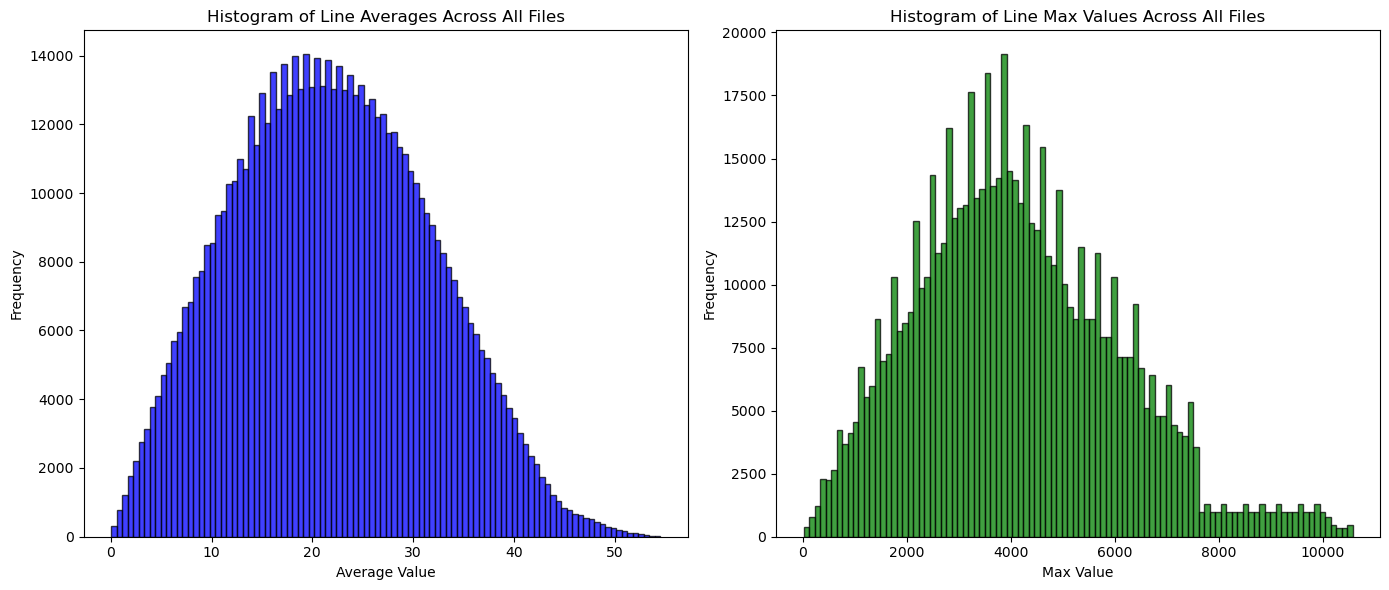

In [58]:
folder_path = '/home/carol/NaroNet-main/Datasets/PCL_outputs/Image_Patch_Representation_ps32'
plot_mean_max(folder_path)

In [45]:
folder_path = "/home/carol/NaroNet-main/Datasets/PCL_outputs/Image_Patch_Representation_ps32"
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    array = np.load(file_path)
    print(f'{filename}: {np.shape(array)}')

h17_6794_tl2.npy: (31000, 264)
h17_6226_tl4.npy: (32800, 264)
h16_16787_tl2.npy: (19580, 264)
h17_6226_tl2.npy: (32800, 264)
h16_11096_tl1.npy: (24038, 264)
h16_19144_tl2.npy: (23800, 264)
h16_28421_tl2.npy: (31416, 264)
h16_16787_tl1.npy: (22784, 264)
h16_7700_tl2.npy: (35076, 264)
h16_11096_tl3.npy: (31866, 264)
h16_11096_tl2.npy: (27813, 264)
h16_19144_tl1.npy: (39720, 264)
h16_28421_tl4.npy: (31416, 264)
h13_10873_tl2.npy: (33605, 264)
h16_28421_tl1.npy: (31416, 264)
h16_12101_tl2.npy: (22650, 264)
h16_7700_tl1.npy: (30336, 264)
h16_15767_tl2.npy: (30222, 264)
h16_9373_tl1.npy: (33320, 264)
h13_10873_tl3.npy: (2950, 264)
h16_19144_tl6.npy: (24252, 264)
h16_9373_tl2.npy: (29750, 264)
h17_6226_tl3.npy: (32800, 264)
h16_19144_tl5.npy: (24252, 264)


In [71]:
folder_path = "/home/carol/NaroNet-main/Datasets/PCL_outputs/Image_Patch_Representation_ps32"
X = 200
count_line_maxes(folder_path, X)

h17_6794_tl2.npy: [2058, 28906, 0]
h17_6226_tl4.npy: [2118, 30646, 0]
h16_16787_tl2.npy: [1656, 17888, 0]
h17_6226_tl2.npy: [2118, 30646, 0]
h16_11096_tl1.npy: [1962, 22040, 0]
h16_19144_tl2.npy: [1956, 21808, 0]
h16_28421_tl2.npy: [2148, 29232, 0]
h16_16787_tl1.npy: [1764, 20984, 0]
h16_7700_tl2.npy: [2490, 32550, 0]
h16_11096_tl3.npy: [2130, 29700, 0]
h16_11096_tl2.npy: [2004, 25773, 0]
h16_19144_tl1.npy: [2634, 37050, 0]
h16_28421_tl4.npy: [2148, 29232, 0]
h13_10873_tl2.npy: [2196, 31373, 0]
h16_28421_tl1.npy: [2148, 29232, 0]
h16_12101_tl2.npy: [1734, 20880, 0]
h16_7700_tl1.npy: [2400, 27900, 0]
h16_15767_tl2.npy: [2046, 28140, 0]
h16_9373_tl1.npy: [2196, 31088, 0]
h13_10873_tl3.npy: [582, 2332, 0]
h16_19144_tl6.npy: [1830, 22386, 0]
h16_9373_tl2.npy: [2106, 27608, 0]
h17_6226_tl3.npy: [2118, 30646, 0]
h16_19144_tl5.npy: [1830, 22386, 0]


In [ ]:
folder_path = "/home/carol/NaroNet-main/Datasets/PCL_outputs/Image_Patch_Representation_ps32"
X=200
analyze_max_pos(folder_path, X)

## Plots Embeddings Exp1

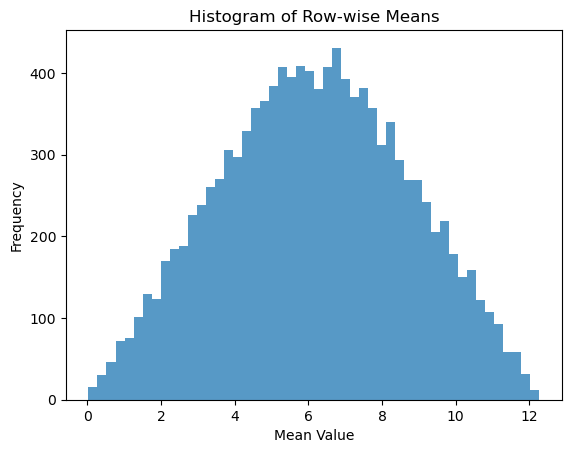

In [13]:
pathemb = ''
emb= np.load(pathemb)
rowwise_maxs(emb)
rowwise_means(emb)

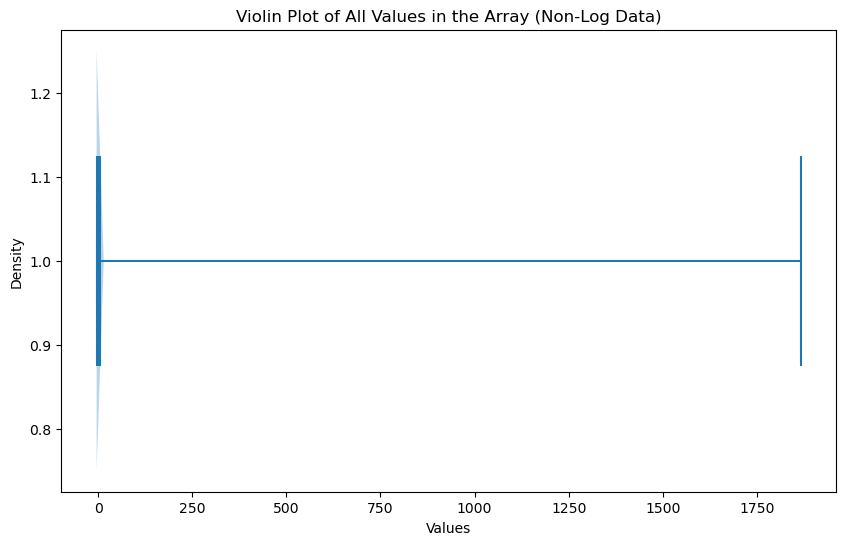

In [26]:
def create_violin_plot_non_log(data):
    # Create the figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create violin plot
    ax.violinplot(data.flatten(), vert=False, showmeans=True, showextrema=True, showmedians=True)
    
    # Add title and labels
    ax.set_title('Violin Plot of All Values in the Array (Non-Log Data)')
    ax.set_xlabel('Values')
    ax.set_ylabel('Density')

    plt.show()

create_violin_plot_non_log(emb)

General plots over the whole dataset

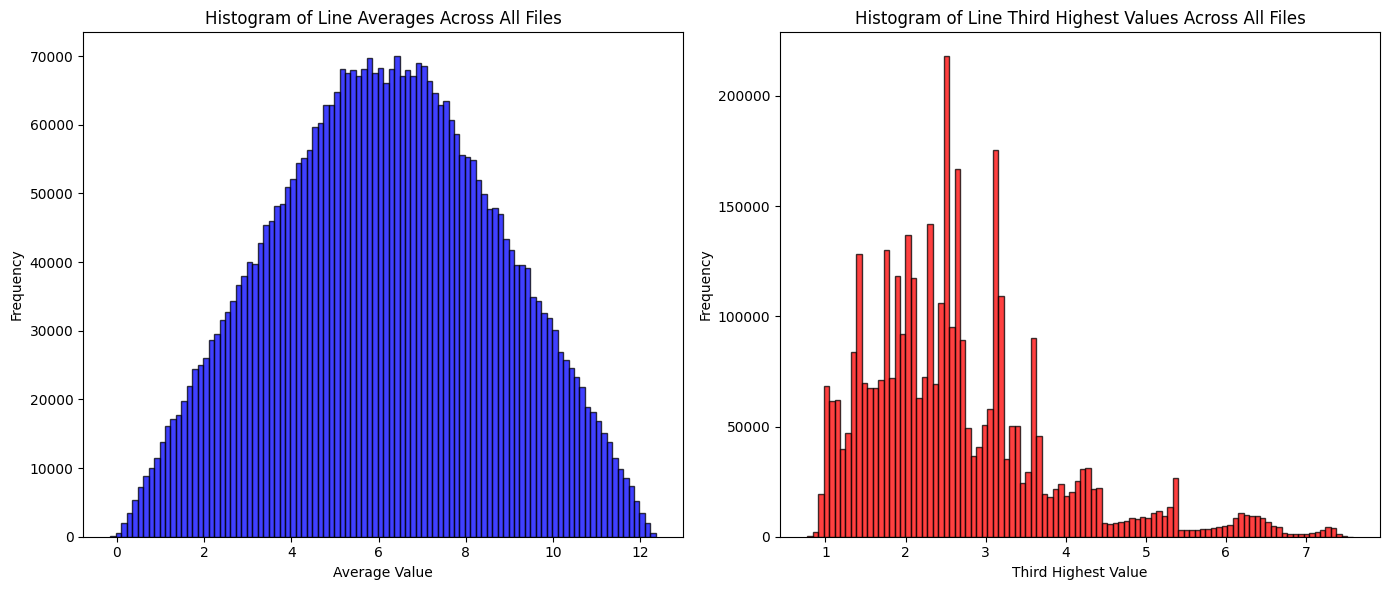

In [17]:
#Run again
folder_path = '/home/carol/NaroNet-main/NaroNet-main/Endometrial_POLE/Patch_Contrastive_Learning/Image_Patch_Representation'
plot_mean_max(folder_path)

## Output checks

In [ ]:
folder_path = "/home/carol/NaroNet-main/EXP3/split reconstruction"
#folder_path = '/home/carol/NaroNet-main/NaroNet-main/Endometrial_POLE/Patch_Contrastive_Learning/Image_Patch_Representation'
plot_mean_max(folder_path)